In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [37]:
df=pd.read_excel("/content/diabetes.xls")

In [38]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [43]:
x.shape

(768, 8)

In [44]:
import matplotlib.pyplot as plt

(array([[768.,   0.,   0.,   0.,   0.],
        [697.,  71.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.],
        [642., 100.,  17.,   6.,   3.],
        [768.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.]]),
 array([  0. , 169.2, 338.4, 507.6, 676.8, 846. ]),
 <a list of 8 BarContainer objects>)

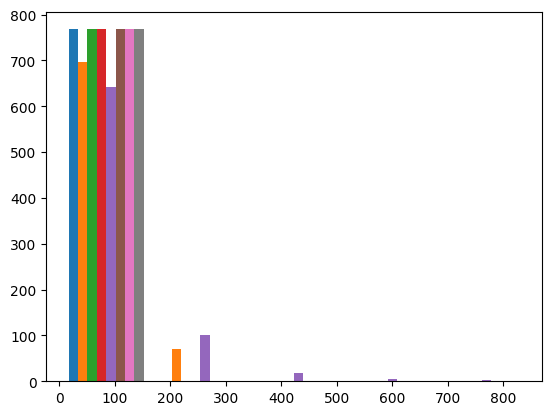

In [45]:
plt.hist(x,bins=5)

In [46]:
y=df[['Outcome']]

In [47]:
y.shape

(768, 1)

(array([500.,   0.,   0.,   0., 268.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

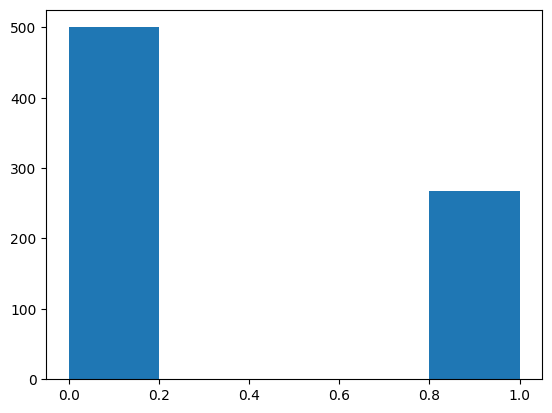

In [48]:
plt.hist(y,bins=5)

In [49]:
train_x ,test_x ,train_y , test_y=train_test_split(x,y , test_size=0.2)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [64]:
svm_c=SVC(kernel='linear')


In [65]:
svm_c.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [66]:
y_pred=svm_c.predict(test_x)

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(test_y, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        94
           1       0.78      0.53      0.63        60

    accuracy                           0.76       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154

Confusion Matrix:
[[85  9]
 [28 32]]
